In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
data_true = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
data_false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [3]:
data_true["label"]= 0
data_false["label"]= 1

In [4]:
data_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
data_false.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
print(data_true.shape)
print(data_false.shape)

(21417, 5)
(23481, 5)


In [7]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [8]:
data_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [9]:
data = pd.concat([data_true, data_false])
data.shape

(44898, 5)

In [10]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
data.head(20)

,title,text,subject,date,label
0,Thousands queue to pay last respects to Thaila...,"BANGKOK (Reuters) - Almost 12 million people, ...",worldnews,"October 5, 2017",0
1,White House rejects report critical of Republi...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"March 13, 2017",0
2,Five ‘All American’ Football Players Booted F...,"The city of Creston, in the heart of Iowa, sit...",News,"September 8, 2017",1
3,GOTTA LOVE IT! PRESIDENT TRUMP Refers to Trude...,President Trump referred to Canadian Prime Min...,politics,"May 27, 2017",1
4,U.S. appeals to higher court over ruling again...,NEW YORK (Reuters) - The U.S. government took ...,politicsNews,"March 17, 2017",0
5,Nine killed as Rohingya aid truck crashes in B...,DHAKA (Reuters) - A truck carrying relief supp...,worldnews,"September 21, 2017",0
6,Rich tycoon takes on Iraqi Kurdish leaders ove...,"SULAIMANIYA, Iraq (Reuters) - On the eve of an...",worldnews,"September 12, 2017",0
7,U.S. general says concerned about Iran's long-...,"TAMPA, Fla (Reuters) - The head of U.S. Centra...",worldnews,"October 12, 2017",0
8,Bristol Palin Cheers For Christian Students F...,"In February, video surfaced of evangelical pas...",News,"March 20, 2016",1
9,Bill on tallying up regulation costs wins U.S....,WASHINGTON (Reuters) - Financial lobbyists on ...,politicsNews,"January 10, 2017",0


In [12]:
y = data["label"]
y.shape

(44898,)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
copied_data = data.copy()

In [15]:
copied_data['title']

0        Thousands queue to pay last respects to Thaila...
1        White House rejects report critical of Republi...
2         Five ‘All American’ Football Players Booted F...
3        GOTTA LOVE IT! PRESIDENT TRUMP Refers to Trude...
4        U.S. appeals to higher court over ruling again...
                               ...                        
44893    Britain's U.S. ambassador discussed Trump retw...
44894    STATE FUNDED PROGRESSIVE INDOCTRINATION: COLLE...
44895    Honduran army enforces curfew after vote count...
44896    U.S. tax avoidance clampdown a potential heada...
44897    Tanks seen heading toward Zimbabwe capital: wi...
Name: title, Length: 44898, dtype: object

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(copied_data)):
    review = re.sub('[^a-zA-Z]', ' ', copied_data['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
corpus

['thousand queue pay last respect thailand late king bhumibol',
 'white hous reject report critic republican health plan',
 'five american footbal player boot team black qb kkk display',
 'gotta love presid trump refer trudeau justin canada video',
 'u appeal higher court rule trump revis travel ban',
 'nine kill rohingya aid truck crash bangladesh',
 'rich tycoon take iraqi kurdish leader independ',
 'u gener say concern iran long term activ region',
 'bristol palin cheer christian student forc religion upon atheist',
 'bill talli regul cost win u financi industri back',
 'mexico step dialogu u firm economi minist',
 'trump critic draw european closer say french minist',
 'never guess predict obama global warm promo trip alaska',
 'french legal system turn villag request christian refuge day attack',
 'trump cabinet record break worst possibl way',
 'factbox build giant wall cut educ depart presid trump would',
 'watch wildli popular outspoken geert wilder call dutch trump plan de isl

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [23]:
X.shape

(44898, 5000)

In [25]:
y = copied_data['label']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [28]:
cv.get_feature_names()[:20]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abort law',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'accept',
 'access',
 'accid',
 'accident']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [32]:
cout_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [33]:
cout_df.head()

,abadi,abandon,abba,abc,abc news,abe,abedin,abil,abl,abort,...,zero,zika,zika fund,zimbabw,zimbabw mnangagwa,zimbabw mugab,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
import matplotlib.pyplot as plt

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier = MultinomialNB()

accuracy: 0.931
Confusion matrix, without normalization


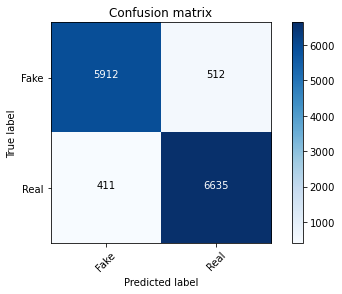

In [38]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score